In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [3]:
def read_image(path):
    im = cv2.imread(path, 0)
    #cv2.imshow('test',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #cv2.waitKey(1)
    return im

def read_image_size(path):
    #print(path)
    im = cv2.imread(path, 0)
    #print(im.shape)
    return im.shape

In [4]:
im1 = read_image(r'D:\machinelearningprojects\chest-xray-pneumonia\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg')

In [5]:
#fig,ax = plt.subplots(figsize = (10,10))#
#ax.imshow(im1, cmap = 'gray')
read_image_size(r'D:\machinelearningprojects\chest-xray-pneumonia\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg')

(439, 712)

In [6]:
from os import listdir
from os.path import isfile, join

In [7]:
path_train_pe = 'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\train\\PNEUMONIA\\'
files_train_pe = [path_train_pe+f for f in listdir(path_train_pe) if isfile(join(path_train_pe, f))]  #list all files under the path
path_val_pe = 'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\val\\PNEUMONIA\\'
files_val_pe = [path_val_pe+f for f in listdir(path_val_pe) if isfile(join(path_val_pe, f))] 
path_test_pe = 'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\test\\PNEUMONIA\\'
files_test_pe = [path_test_pe+f for f in listdir(path_test_pe) if isfile(join(path_test_pe, f))]

path_train_nm = 'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\train\\NORMAL\\'
files_train_nm = [path_train_nm+f for f in listdir(path_train_nm) if isfile(join(path_train_nm, f))]  #list all files under the path
path_val_nm = 'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\val\\NORMAL\\'
files_val_nm = [path_val_nm+f for f in listdir(path_val_nm) if isfile(join(path_val_nm, f))] 
path_test_nm = 'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\test\\NORMAL\\'
files_test_nm = [path_test_nm+f for f in listdir(path_test_nm) if isfile(join(path_test_nm, f))]


files_all = files_train_pe + files_val_pe + files_test_pe + files_train_nm + files_val_nm + files_test_nm

In [8]:
image_shape = []
for file in files_all:
    #print(file)
    image_shape.append(read_image_size(file))

In [14]:
np.array(image_shape)[:,0]

array([ 760,  768,  863, ..., 1048, 1489, 1705])

(array([  18.,   70.,  450., 1392., 1765., 1293.,  650.,  171.,   40.,
           7.]),
 array([0.29596413, 0.38607215, 0.47618017, 0.56628819, 0.65639621,
        0.74650423, 0.83661225, 0.92672027, 1.01682829, 1.10693631,
        1.19704433]),
 <a list of 10 Patch objects>)

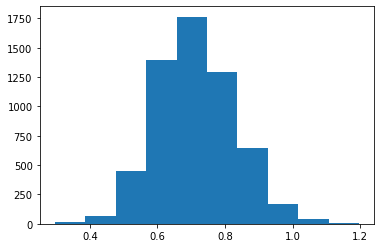

In [36]:
plt.hist(np.divide(np.array(image_shape)[:,0], np.array(image_shape)[:,1]))

In [50]:
resize_x, resize_y = np.min(np.array(image_shape)[:,1]*0.7).astype('int32'),     \
                np.min(np.array(image_shape)[:,1]).astype('int32')

In [65]:
np.array(image_shape)[:,1].tolist().index(np.min(np.array(image_shape)[:,1].tolist()))

2341

In [58]:
print("resize_x = {}, resize_y = {}".format(resize_x, resize_y))

resize_x = 268, resize_y = 384


In [75]:
files_all[2341]

'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\train\\PNEUMONIA\\person407_virus_811.jpeg'

In [80]:
test = cv2.resize(src=read_image(files_all[2340]), dsize = (resize_x, resize_y), interpolation = cv2.INTER_AREA)

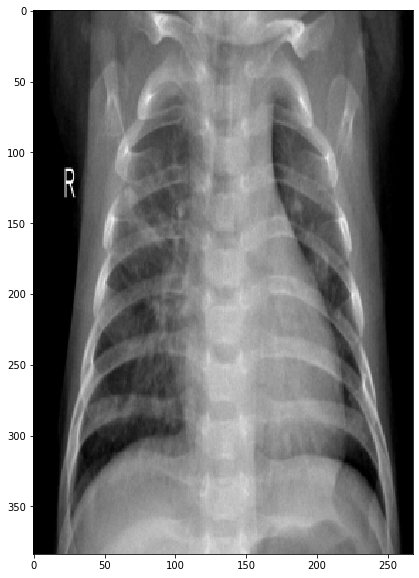

In [81]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(test, cmap = 'gray')

In [82]:
test2 = cv2.resize(src=read_image(files_train_nm[1]), dsize = (resize_x, resize_y), interpolation = cv2.INTER_AREA)

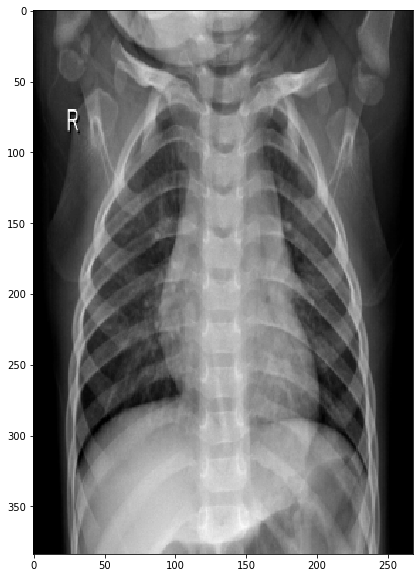

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(test2, cmap = 'gray')

In [94]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [118]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\train\\',
                   target_size = (64, 64),
                   batch_size = 32,
                   class_mode = 'binary')

val_generator = val_datagen.flow_from_directory(
                'D:\\machinelearningprojects\\chest-xray-pneumonia\\chest_xray\\val\\',
                 target_size = (64, 64),
                 batch_size = 1,
                 class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [119]:
5216/32

163.0

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), 
                 activation = 'relu', input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size = (3,3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 163, 
                   epochs = 10,
                   validation_data = val_generator,
                   )

Epoch 1/10
163/163 [==============================] - 136s 834ms/step - loss: 0.2978 - accuracy: 0.8687 - val_loss: 0.1242 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 135s 827ms/step - loss: 0.1162 - accuracy: 0.9559 - val_loss: 0.0067 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 138s 848ms/step - loss: 0.1021 - accuracy: 0.9609 - val_loss: 0.1537 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 137s 841ms/step - loss: 0.0914 - accuracy: 0.9663 - val_loss: 0.0874 - val_accuracy: 0.6875
Epoch 5/10
 73/163 [============>.................] - ETA: 1:16 - loss: 0.0814 - accuracy: 0.9662